## Landau-Khalatnikov Equation

This notebook attempts to solve the Landau-Khalatnikov Equation. In this cell I provide context to how the equation was derived and the formula used to solve it before getting to the code.   


Landau's Free Energy Functional introduced the free energy functional $F(\phi)$ to model the free energy in terms of an order parameter $\phi$, which is really small, near the critical point, where the system experiences large fluctuations in its physical properties. 


$F(\phi) = F_0 + \alpha \phi^2 + \beta \phi^4 + \gamma \phi^6 ... $


On first glance, it seems to look quite similar to the Taylor expansion, which is supported by two assumptions:

- The free energy is assumed to be analytic near the critical point meaning it can be represented by some power series, which has been proven experimentally and supported by microscopic theories such as Mean-Field Theory (effect of neighbours causes averaging out), Renormalization Group Theory (macroscopic view shows smooth long-range effects dominating), etc.
- The phase transitions are symmetrical meaning $\phi \rightleftarrows -\phi$ transitions are allowed so we only use the even powers of $\phi$

The coefficients $\alpha, \beta, etc. $ are phenomological coefficients meaning they have been derived experimentally.


The LK equation describes the time evolution of Polarization as the system tries to minimize the free energy denoted by the equation $\frac {dP}{dt} = -\Gamma \frac{dF(P)}{dP}$ where P is Polarization, $\frac{F(P)}{P}$ is the functional derivative of free energy functional with order parameter P.


The free enregy functional is given by $F(P) = \alpha P^2 + \beta P^4 + \gamma P^6 - E \cdot P$ where E is the Electric field. (I believe this should be a vector but then that means P should also be a vector for EP to be a scalar. But then the power series parameter P is a scalar?)


Using this form, we can now formulate the time dynamics of P by:


$\frac {dP}{dt} = -\Gamma (2\alpha P + 4\beta P^3 + 6\gamma P^5 - E)$

but for stedy-state conditions $\frac {dP}{dt} =  0$ leading us to 

$E =  P(2\alpha + 4\beta P^2 + 6\gamma P^4)$


With this we have what we need to solve for the electric field which in turn can help solve for other properties of the system.

References: 
- https://users.ox.ac.uk/~phys1116/msm-rg2.pdf
- https://www.sciencedirect.com/science/article/pii/S1007570420303543?via=ihub
- https://ieeexplore.ieee.org/document/8268385

I am trying to follow the Mathematica stack exchange and use the coefficient values listed there: https://mathematica.stackexchange.com/questions/266662/solving-2d-landau-khalatnikov-equation-poisson-equation-using-finite-element-a

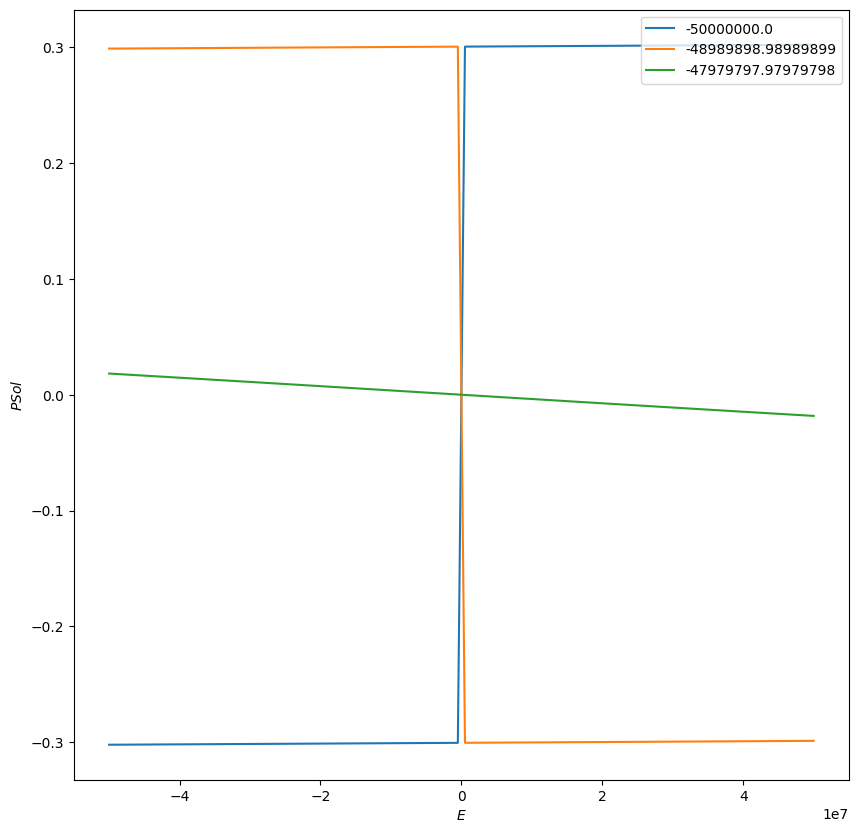

In [46]:
import numpy as np
import matplotlib.pyplot as plt


alpha = -1.35e9
beta = -2.64e10
gamma = 2.5e11 

l = np.linspace(-50e6, 50e6, 100)
E = l
P = np.linspace(-50, 50, 100)

plt.figure(figsize=(10, 10))
real_roots = []
for e in E:
    #y = 2*alpha * P + 4*beta * P**3 + 6*gamma * P**5 - E
    all_roots = np.roots([6*gamma, 0, 4*beta, 0, 2*alpha, -e])
    rr = all_roots[np.isreal(all_roots)].real # [x3]
    real_roots.append(rr)

# print(all_roots) 
# print(real_roots) # P sol vs E


plt.plot(E, real_roots)

plt.ylabel('$P Sol$')
plt.xlabel('$E$')
plt.legend(E)
plt.show()

2.384185791015625e-06


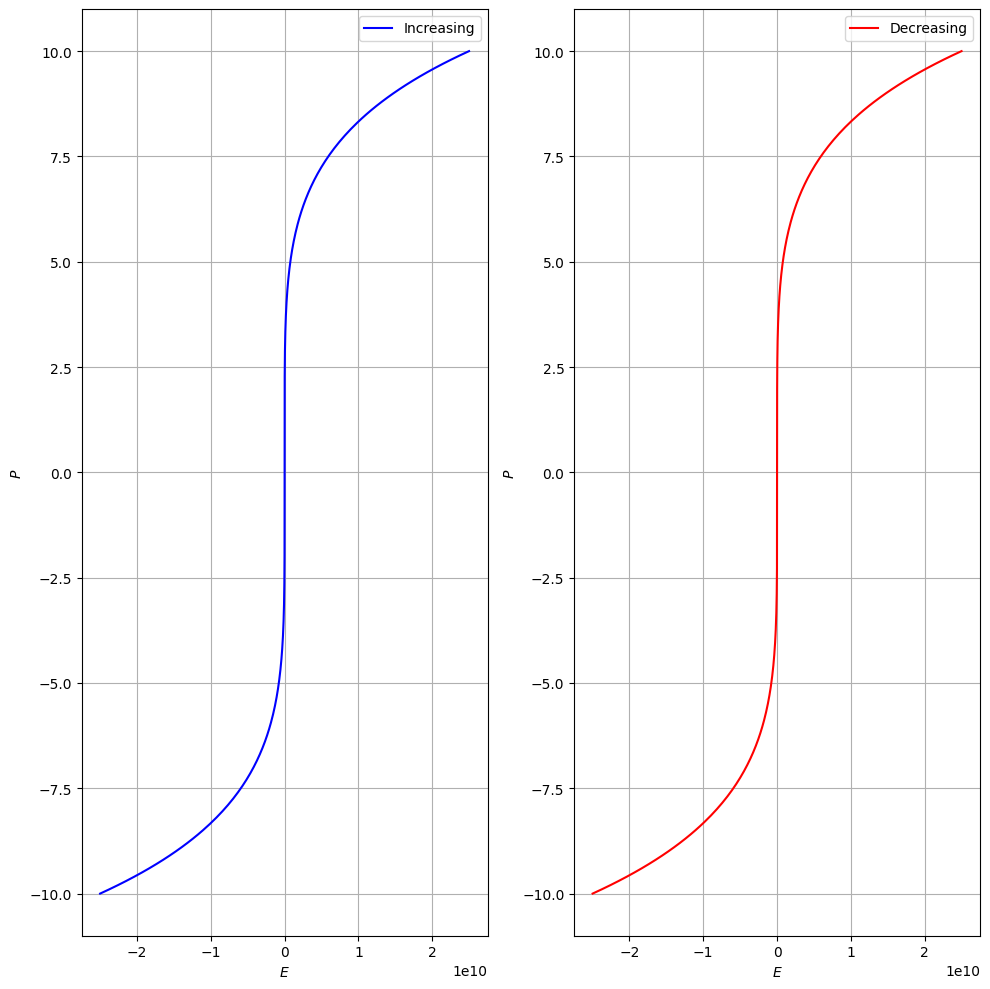

In [18]:
import numpy as np
import matplotlib.pyplot as plt

alpha = -1.35e9
beta = -2.64e10
gamma = 2.5e11 

P_values = np.linspace(-10, 10, 400)

E_increasing = alpha * P_values + beta * P_values**3 + gamma * P_values**5
E_decreasing = alpha * P_values[::-1] + beta * P_values[::-1]**3 + gamma * P_values[::-1]**5

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].plot(E_increasing / 1e6, P_values, label='Increasing', color='blue')
axs[0].set_xlabel('$E$')
axs[0].set_ylabel('$P$')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(E_decreasing / 1e6, P_values[::-1], label='Decreasing', color='red')
axs[1].set_xlabel('$E$')
axs[1].set_ylabel('$P$')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


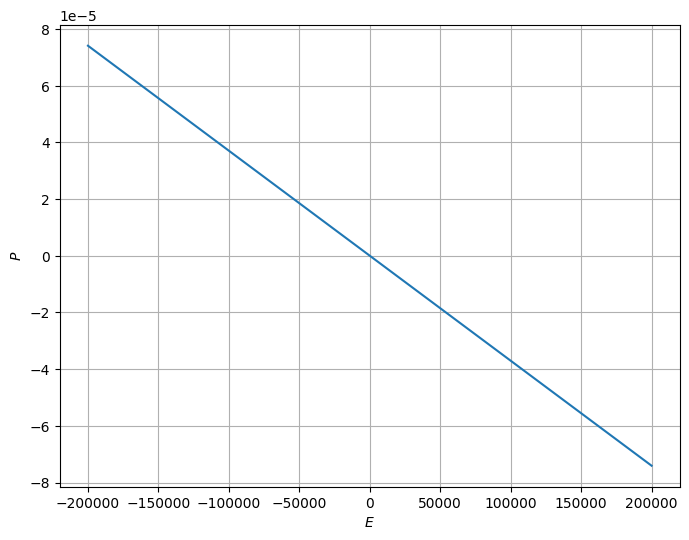

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

alpha = -1.35e9
beta = -2.64e10
gamma = 2.5e11 

def dF_dP(P, E):
    return 2*alpha*P + 4*beta*P**3 + 6*gamma*P**5 - E

E_range = np.linspace(-2e5, 2e5, 200)

P = []

P0 = 0 
for E in E_range:
    
    def equation_to_solve(P, E=E):
        return dF_dP(P, E)
    
    P_sol = fsolve(equation_to_solve, P0)[0] 
    
    if len(P) > 0:
        def equation_to_solve_min(P):
            return abs(dF_dP(P, E))
        
        P_sol = fsolve(equation_to_solve_min, P_sol)[0] 
    
    P.append(P_sol)
    P0 = P_sol

P = np.array(P)

plt.figure(figsize=(8,6))
plt.plot(E_range, P)
plt.xlabel('$E$')
plt.ylabel('$P$')
plt.grid(True)
plt.show()


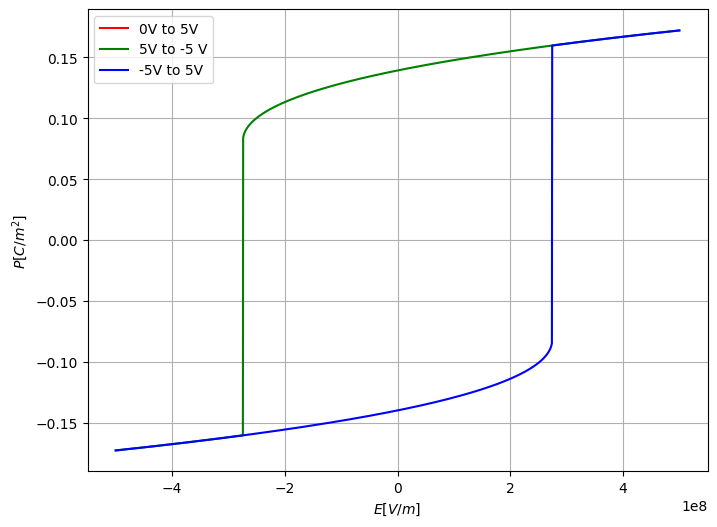

In [3]:
# I am not able to figure out the Mathematica
# Triyng to follow FerroX instructions instead
# I know I can find E from V / d
# Then use that to solve for P

import numpy as np
import matplotlib.pyplot as plt

alpha = -2.5e9
beta = 6.0e10
gamma = 1.5e11


d = 10e-9  # Stack Thickness is 10nm

# Dividing the curve into two parts one switching from -ve to +ve and then the other vice versa
# V_increasing = np.linspace(-5.0, 5.0, 2000)
# V_decreasing = np.linspace(5.0, -5.0, 2000)
V_zero_five =  np.linspace(0.0, 0, 2000)
V_decreasing = np.linspace(5.0, -5.0, 2000)
V_increasing = np.linspace(-5.0, 5.0, 2000)

def calculate_E(V, d):
    return V / d

def dF_dP(P, E):
    return 2 * alpha * P + 4 * beta * P**3 + 6 * gamma * P**5 - E

# Initializing Polarization as a uniformly distributed random number in [-0.002, 0.002]

P0 = np.random.uniform(-0.02, 0.02)

def solve_polarization(V_values, P0, d):
    P = []
    for V in V_values:
        E = calculate_E(V, d)

        roots = np.roots([6*gamma, 0, 4*beta, 0, 2*alpha, -E])
        real_roots = roots[np.isreal(roots)].real
        
        # To maintain continuity choosing the real root closest to previous solution
        if len(real_roots) > 0:
            P_sol = min(real_roots, key=lambda x: abs(x - P0)) 
        else:
            P_sol = P0
        P0 = P_sol
        P.append(P0)
    return P

# 0 - 5
# 5 - -5
# -5 - 0
P_zero_five = solve_polarization(V_zero_five, P0, d)
P_decreasing = solve_polarization(V_decreasing, P_zero_five[-1], d)
P_increasing = solve_polarization(V_increasing, P_decreasing[-1], d)


V_range = np.concatenate([V_zero_five, V_decreasing, V_increasing])
P_values = np.concatenate([P_zero_five, P_decreasing, P_increasing])

# P_decreasing = solve_polarization(V_decreasing, P0, d)
# P_increasing = solve_polarization(V_increasing, P_decreasing[-1], d)

# V_range = np.concatenate([V_decreasing, V_increasing])
# P_values = np.concatenate([P_decreasing, P_increasing])

E_zero_five = calculate_E(V_zero_five, d)
E_decreasing = calculate_E(V_decreasing, d)
E_increasing = calculate_E(V_increasing, d)
#plt.plot(E_range, P_values)

plt.figure(figsize=(8, 6))
plt.plot(E_zero_five, P_zero_five, "red", label="0V to 5V")
plt.plot(E_decreasing, P_decreasing, "green", label="5V to -5 V")
plt.plot(E_increasing, P_increasing, "blue", label="-5V to 5V")

plt.xlabel('$E [V/m]$')
plt.ylabel('$P[C/m^2]$')
plt.grid(True)
plt.legend()
plt.show()


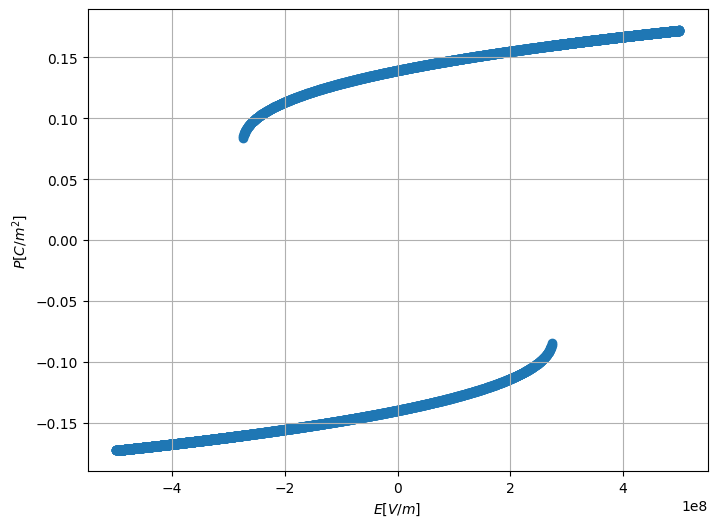

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(E_range, P_values)
plt.xlabel('$E [V/m]$')
plt.ylabel('$P[C/m^2]$')
plt.grid(True)
plt.show()